# Machine Learning - Final Project
## Danielle Shelton

Working with a dataset found on Kaggle I would like to focus my attention on salary of workers in different countries. As the name of the dataset suggests, there is probably information to be found looking into the relationship between country and race but I would also like to see how other features have an impact. 

https://www.kaggle.com/datasets/sudheerp2147234/salary-dataset-based-on-country-and-race

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
# import dataset 

df= pd.read_csv("Salary_Data_Based_country_and_race.csv")
df.head()

,Age,Gender,Education_Level,Job_Title,Experience,Salary,Country,Race
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0,UK,White
1,28.0,Female,Master's,Data Analyst,3.0,65000.0,USA,Hispanic
2,45.0,Male,PhD,Senior Manager,15.0,150000.0,Canada,White
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0,USA,Hispanic
4,52.0,Male,Master's,Director,20.0,200000.0,USA,Asian


# Exploratory Data Analysis

In [3]:
df.describe()

,Age,Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              6702 non-null   float64
 1   Gender           6702 non-null   object 
 2   Education_Level  6701 non-null   object 
 3   Job_Title        6702 non-null   object 
 4   Experience       6701 non-null   float64
 5   Salary           6699 non-null   float64
 6   Country          6704 non-null   object 
 7   Race             6704 non-null   object 
dtypes: float64(3), object(5)
memory usage: 419.1+ KB


Looking at the information above we can see there are a total of 6704 entries and 8 columns with datatypes consisting of float for the numerical columns and object for the categorical. There are some features with nulls, but the number of nulls are small, at most 5 for Salary. I chose to use fill forward on all the columns with null values to replace them. 

In [5]:
# replace null values

df.fillna(method='ffill', inplace=True)

In [6]:
# confirm the number of null values is now zero

df.isnull().sum()

Age                0
Gender             0
Education_Level    0
Job_Title          0
Experience         0
Salary             0
Country            0
Race               0
dtype: int64

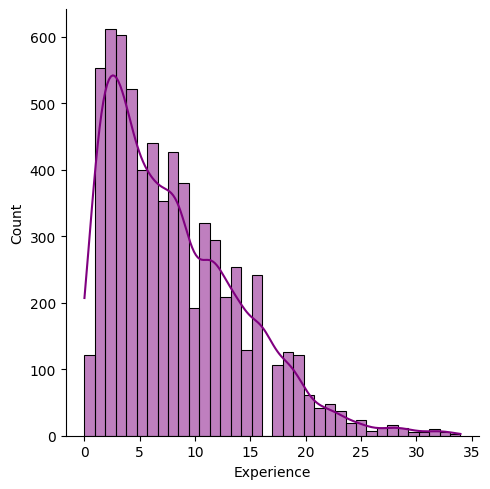

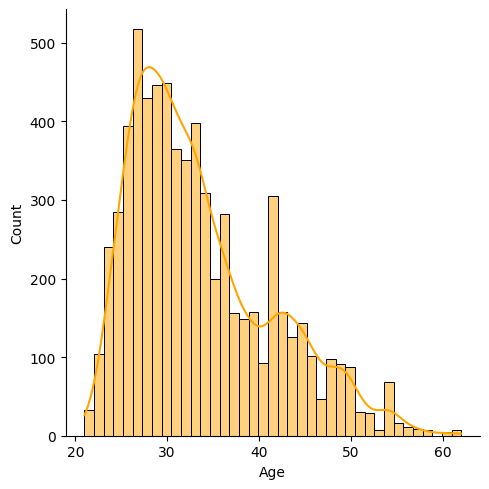

In [7]:
# Compare Years of Experience with Age

sns.displot(x='Experience', data=df, color='purple', kde=True)
sns.displot(x='Age', data=df, color='orange', kde=True)

Looking at the plot of Years of Experience and the plot of Age we see they follow a similar pattern. It looks like the majority of people in this data set are younger and have less than 10 years of experience. An easy assumption would be that they are younger people with less work experience however people come into the workforce at all different ages for different reasons. 

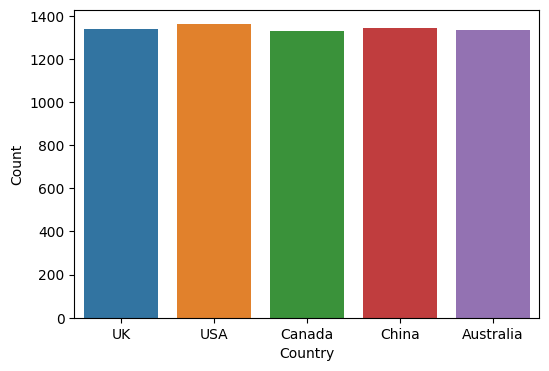

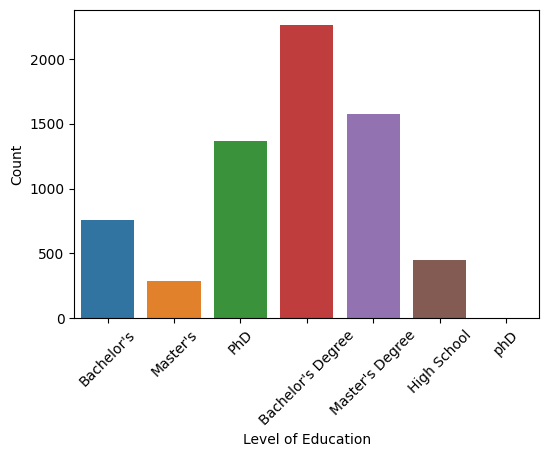

In [8]:
# take a quick look at what countries people are from and their education level

plt.figure(figsize=(6,4))
sns.countplot(x='Country', data=df)
plt.ylabel('Count')
plt.xlabel('Country')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='Education_Level', data=df)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.xlabel('Level of Education')
plt.show()



The breakdown of people is pretty evenly split amongst 5 countries however the vast majority hold bachelor degrees. 


<Axes: >

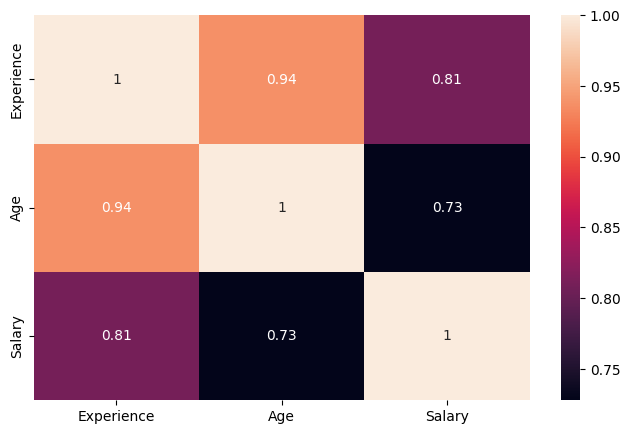

In [9]:
# Create a heatmap using the given numerical data

corr_map = df[['Experience','Age','Salary']].corr()
fig=plt.figure(figsize=(8,5))
sns.heatmap(corr_map, annot=True)

Reviewing the heatmap we see a moderate to high correlation between Age and Years of Experience. The correlation between Age and Salary is extremely low and the correlation between Salary and Experience is lower then expected too.  

Text(0.5, 1.0, 'Salary Distribution by Race')

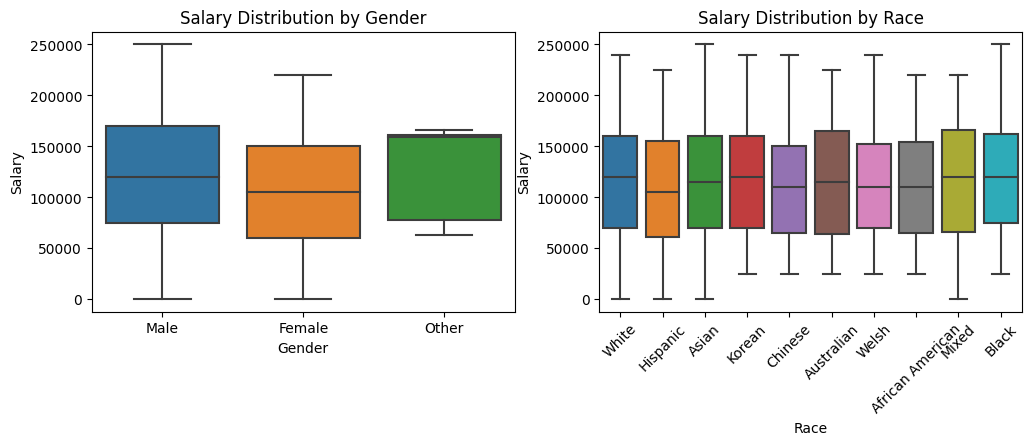

In [10]:
# look at Salary distribution with respect to Gender, Race, Education, and Country

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.boxplot(data=df, x='Gender', y='Salary')
plt.title('Salary Distribution by Gender')

plt.subplot(2,2,2)
sns.boxplot(data=df, x='Race', y='Salary')
plt.xticks(rotation=45)
plt.title('Salary Distribution by Race')

Text(0.5, 1.0, 'Salary Distribution by Country')

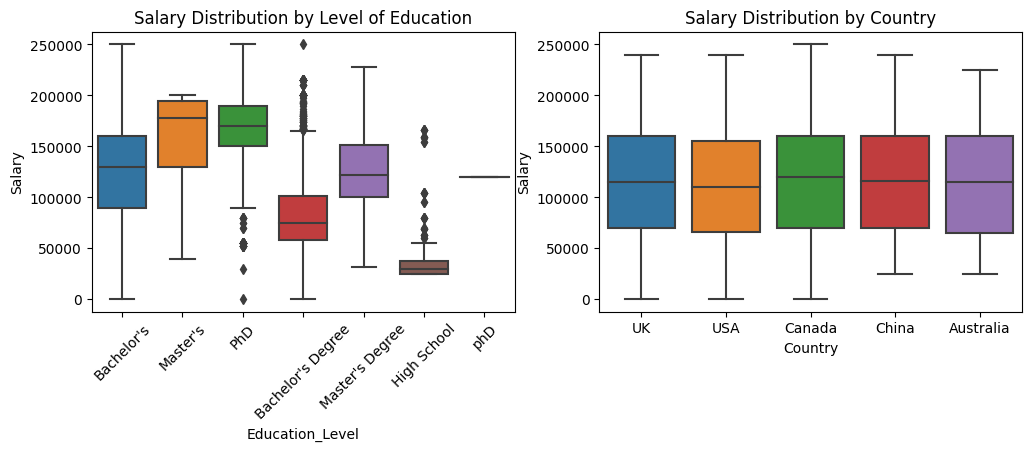

In [11]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,3)
sns.boxplot(data=df, x='Education_Level', y='Salary')
plt.xticks(rotation=45)
plt.title('Salary Distribution by Level of Education')

plt.subplot(2,2,4)
sns.boxplot(data=df, x='Country', y='Salary')
plt.title('Salary Distribution by Country')

Through boxplots we see the distribution of Salary across Gender, Race, Education Level and Country. There is a lot to see here, including the fact that Canada is the country with the largest Salary spread. Not surprisingly, Men are still doing better than women but the third category of Other left me with questions. How large is this category? Are these people who failed to answer that question or did they pick Other intentionally?

In [12]:
df['Gender'].value_counts()

Gender
Male      3676
Female    3014
Other       14
Name: count, dtype: int64

In [13]:
# Calculate average salary by job title

average_by_job = df.groupby('Job_Title')['Salary'].mean().sort_values(ascending=False)
top_10_jobs = average_by_job[:10]
top_10_jobs

Job_Title
Chief Technology Officer       250000.000000
CEO                            250000.000000
Chief Data Officer             220000.000000
Director of Data Science       204561.403509
VP of Finance                  200000.000000
Director                       200000.000000
VP of Operations               190000.000000
Operations Director            190000.000000
Director of Human Resources    187500.000000
Marketing Director             183984.375000
Name: Salary, dtype: float64

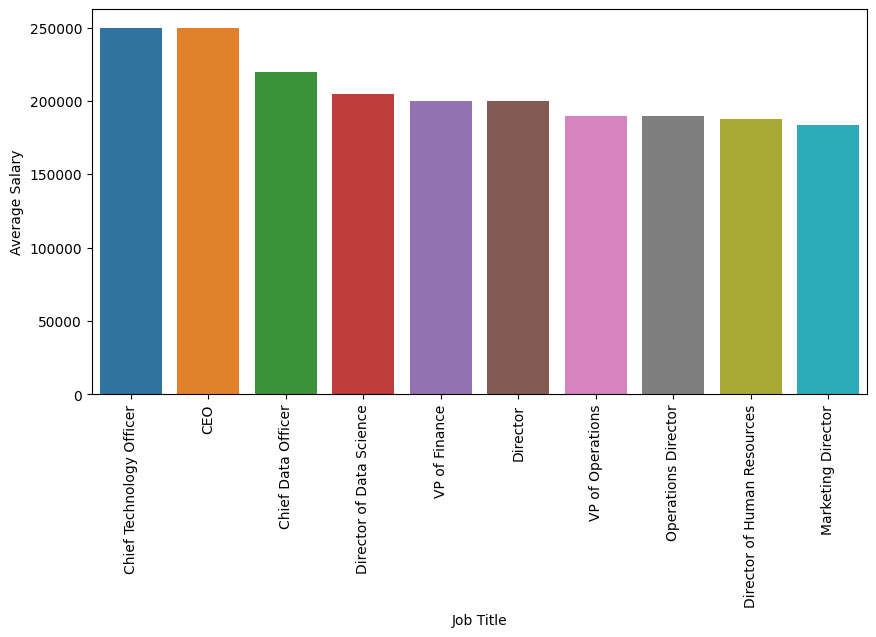

In [14]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_jobs.index, y=top_10_jobs.values)
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=90)
plt.show()

There are to many Job Titles to list them all so I chose to show the Top Ten Jobs based on Salary. They are all Director and VP roles.

In [15]:
#Use .replace and .factorize to change categorical data to numerical data

df['Gender_ID'] = pd.factorize(df.Gender)[0]

df['Country']=df['Country'].replace(['Australia','China','Canada','UK','USA'],[1,2,3,4,5])

df['Race']=df['Race'].replace(['White','Hispanic','Asian','Korean','Chinese','Australian','Welsh','African American','Mixed','Black'],[1,2,3,4,5,6,7,8,9,10])

df['Education_Level']=df['Education_Level'].replace(["Bachelor's","Master's","PhD","Bachelor's Degree","Master's Degree","High School","phD"],["bs","ms","phd","bs","ms","hs","phd"])

In [16]:
df['Education_Level']=df['Education_Level'].replace(["hs","bs","ms","phd"],[1,2,3,4])

In [17]:
df.insert(loc=9, column="S_over_150k", value=df['Salary']//150000)
df

,Age,Gender,Education_Level,Job_Title,Experience,Salary,Country,Race,Gender_ID,S_over_150k
0,32.0,Male,2,Software Engineer,5.0,90000.0,4,1,0,0.0
1,28.0,Female,3,Data Analyst,3.0,65000.0,5,2,1,0.0
2,45.0,Male,4,Senior Manager,15.0,150000.0,3,1,0,1.0
3,36.0,Female,2,Sales Associate,7.0,60000.0,5,2,1,0.0
4,52.0,Male,3,Director,20.0,200000.0,5,3,0,1.0
...,...,...,...,...,...,...,...,...,...,...
6699,49.0,Female,4,Director of Marketing,20.0,200000.0,4,9,1,1.0
6700,32.0,Male,1,Sales Associate,3.0,50000.0,1,6,0,0.0
6701,30.0,Female,2,Financial Manager,4.0,55000.0,2,5,1,0.0
6702,46.0,Male,3,Marketing Manager,14.0,140000.0,2,4,0,0.0


In [18]:
# Create an updated dataset that includes only the features I plan to work with

df1 = df[['Age','Gender_ID','Education_Level','Experience','S_over_150k','Country','Race']]
df1.head()

,Age,Gender_ID,Education_Level,Experience,S_over_150k,Country,Race
0,32.0,0,2,5.0,0.0,4,1
1,28.0,1,3,3.0,0.0,5,2
2,45.0,0,4,15.0,1.0,3,1
3,36.0,1,2,7.0,0.0,5,2
4,52.0,0,3,20.0,1.0,5,3


For the Decision Tree and Logistic Regression Model I worked with the dataset shown above. Here the goal is not to predict the Salary but to predict whether the Salary is above or below a threshold of $150,000. I chose this number by looking for an income above the midpoint. 

In [19]:
# Create a second set I will use as well

df2 = df[['Age','Gender_ID','Education_Level','Experience','Salary','Country','Race']]
df2.head()

,Age,Gender_ID,Education_Level,Experience,Salary,Country,Race
0,32.0,0,2,5.0,90000.0,4,1
1,28.0,1,3,3.0,65000.0,5,2
2,45.0,0,4,15.0,150000.0,3,1
3,36.0,1,2,7.0,60000.0,5,2
4,52.0,0,3,20.0,200000.0,5,3


The second dataset is used in the Linear Regression Model with the purpose of predicting actual Salaries.

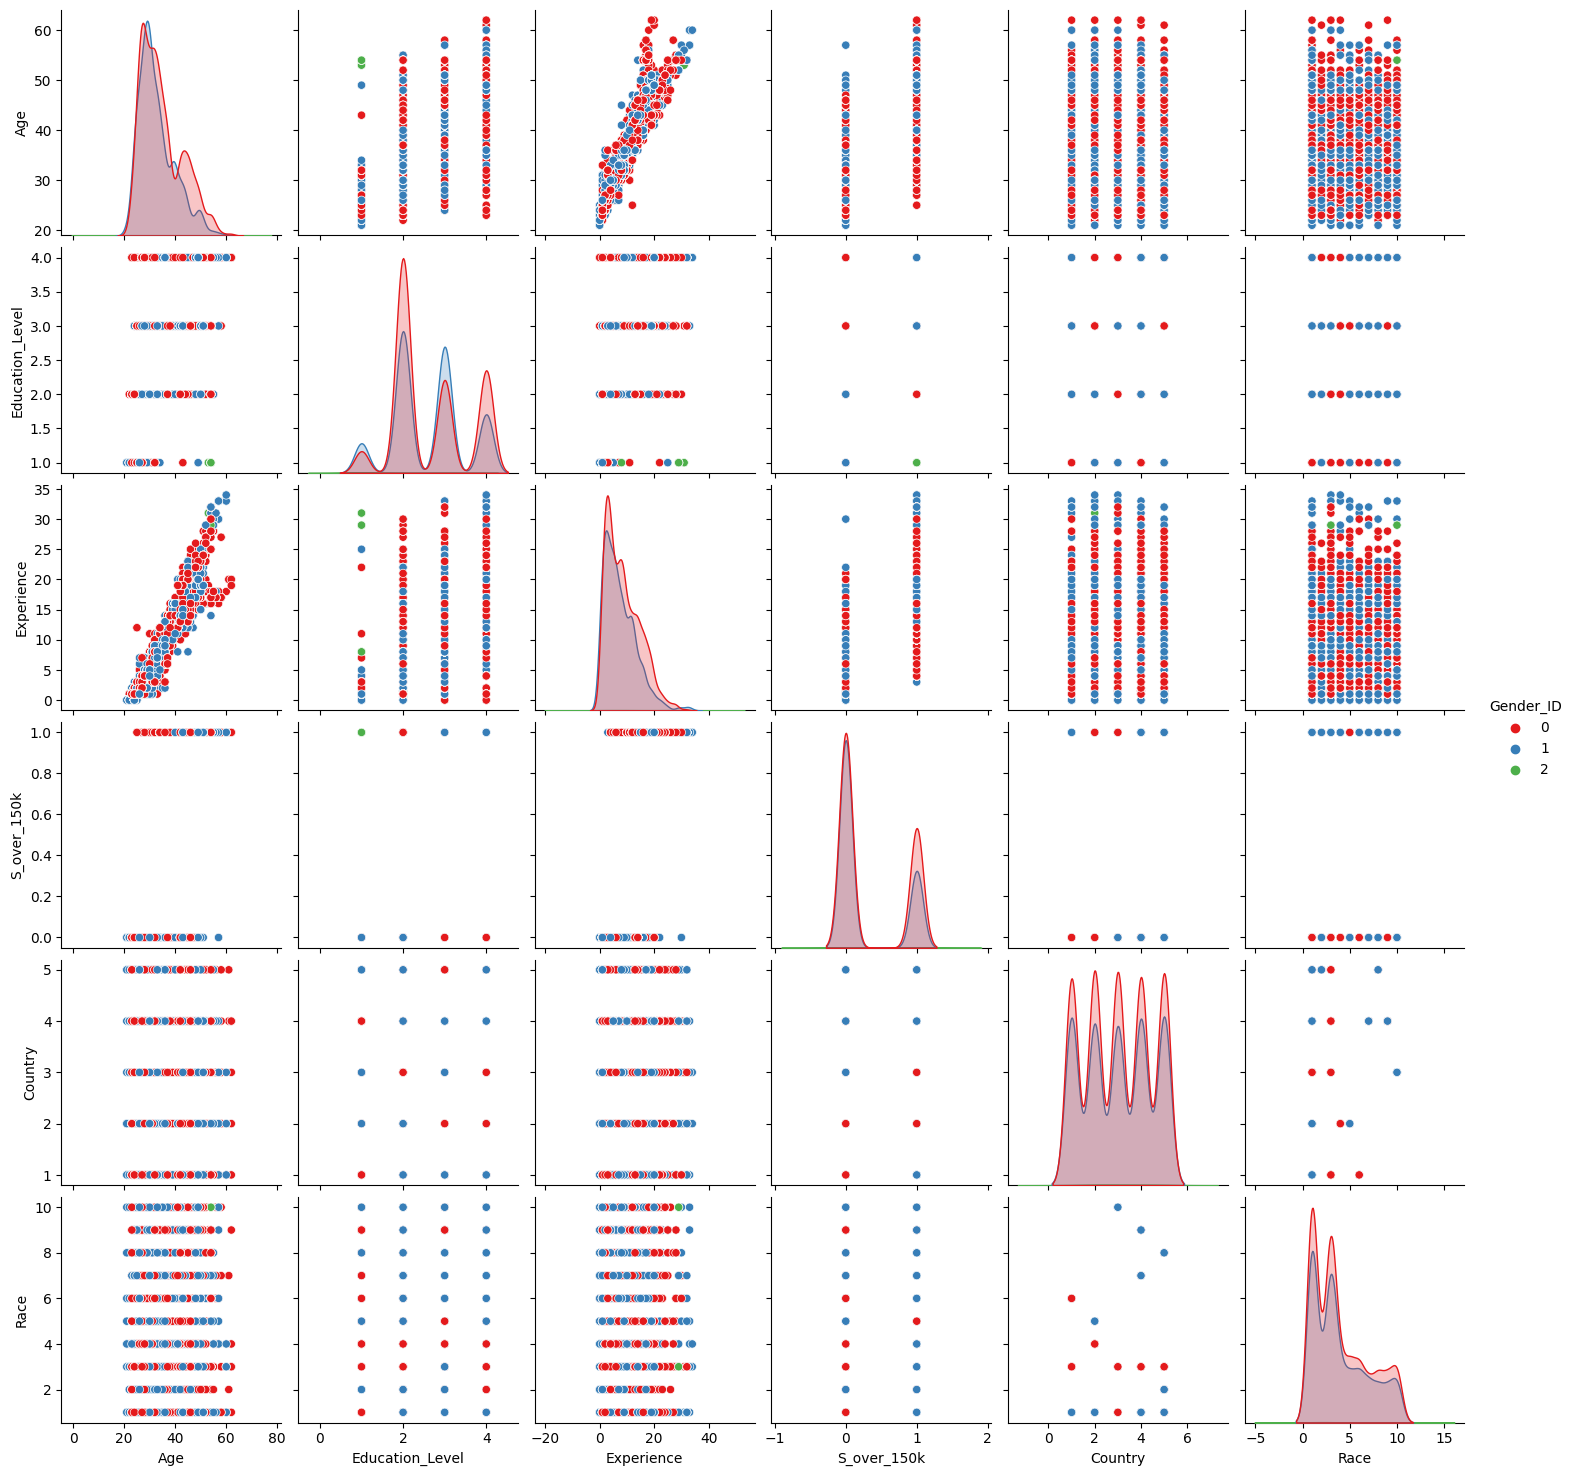

In [20]:
# Using data for the Decision Tree create a Seaborn pairplot around Gender ID
# 0/red = male, 1/blue = female, 2/green = other

sns.pairplot(df1, hue = 'Gender_ID', palette = 'Set1')

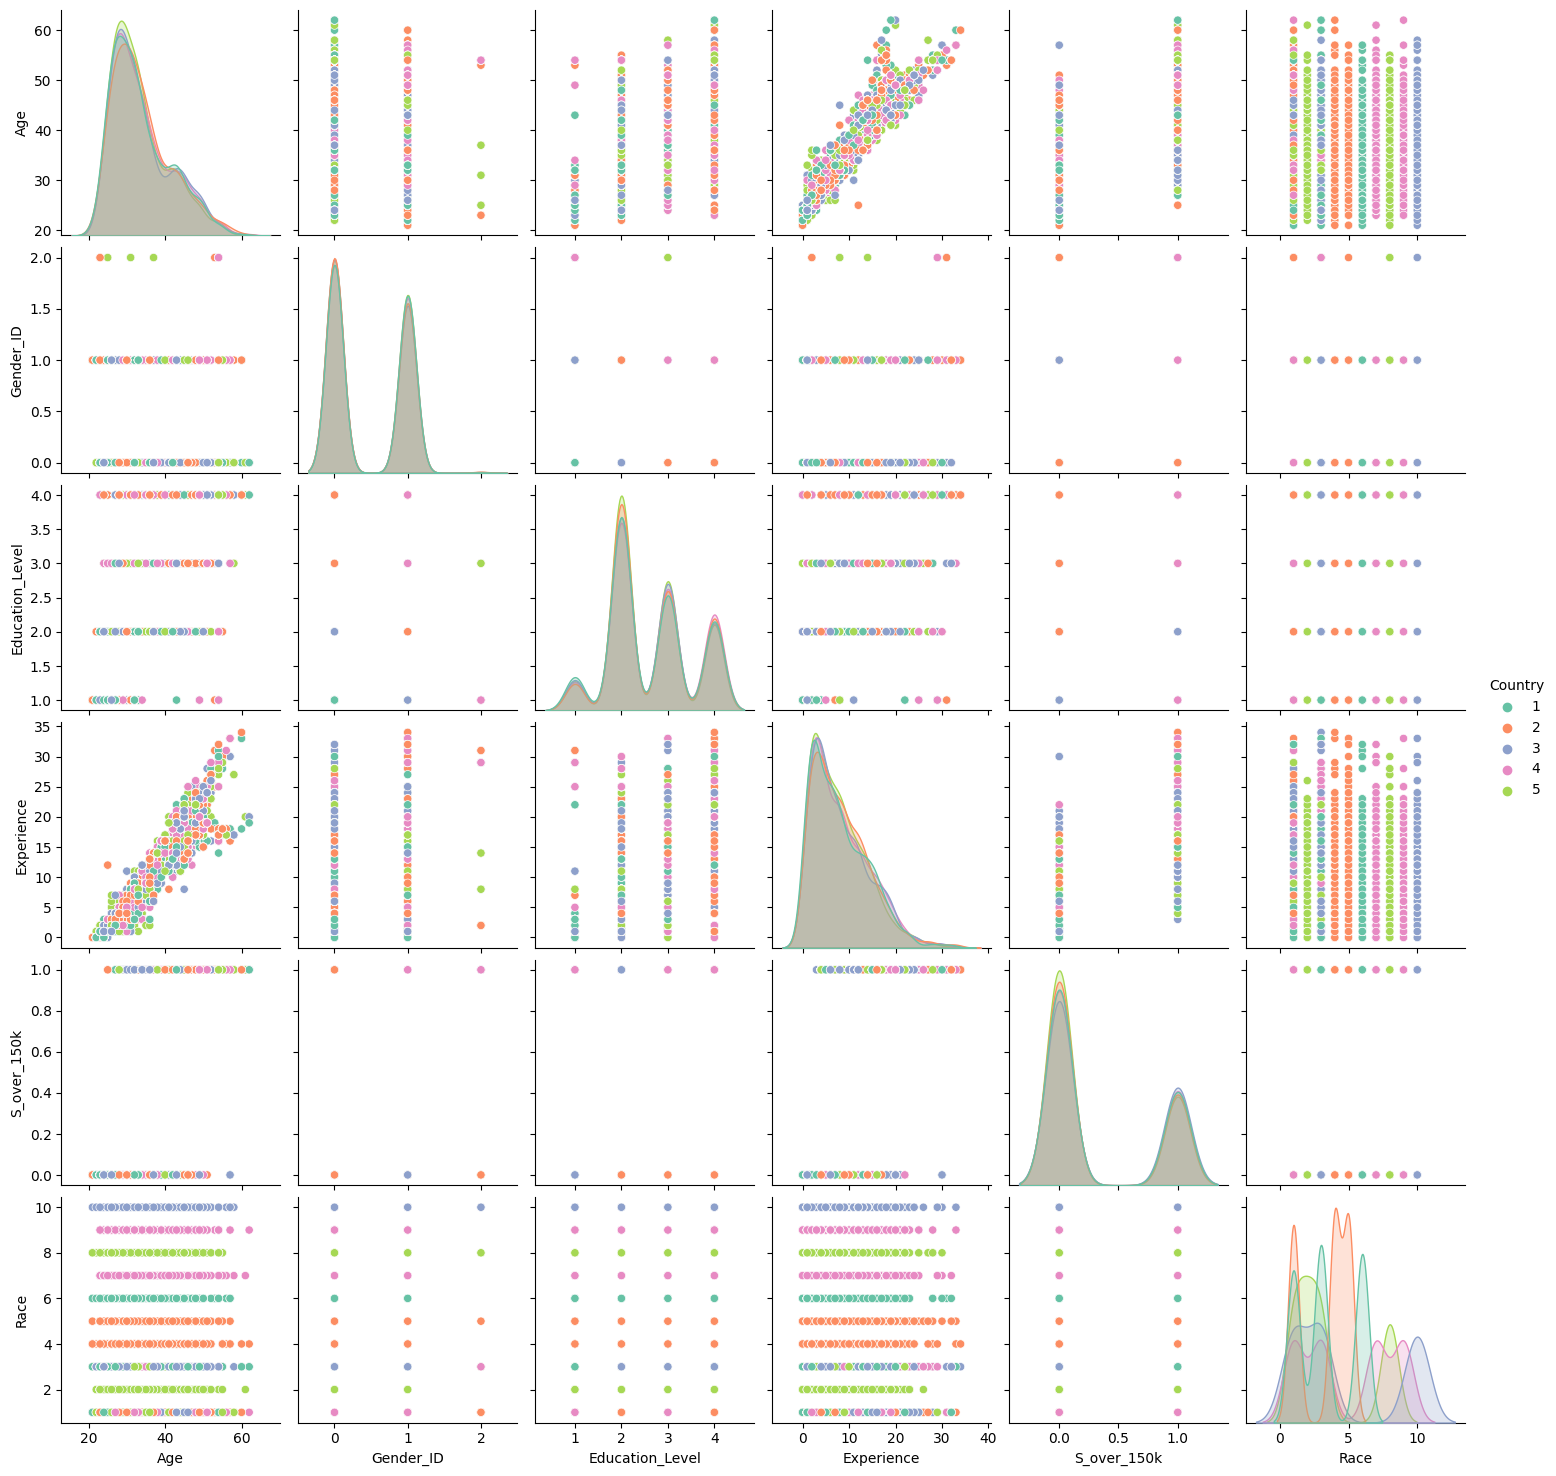

In [21]:
# Using data for the Decision Tree create a Seaborn pairplot around Country
# 1 = Australia, 2 = China, 3 = Canada, 4 = UK, 5 = USA

sns.pairplot(df1, hue = 'Country', palette = 'Set2')

# Decision Tree

In [22]:
# divide data into X - the independent values and y - the dependent value

X = df1.drop('S_over_150k', axis=1)
y = df1.S_over_150k

In [23]:
# Determine a size for the test set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 101)

In [24]:
# Create classification for the decision tree. 

clf = tree.DecisionTreeClassifier(ccp_alpha=0.001, max_depth=7)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=7)

I first created a decision tree with no parameters to see what it looked like. The tree was large, with to many nodes that overlapped each other. All of the scores were over 90% - accuracy, precision, recall but the tree itself was to large. I first tried pruning it and then added in a maximum number of nodes. 

In [25]:
predictions=clf.predict(X_test)

In [26]:
# Accuracy, Precision, and Recall

A = accuracy_score(y_test, predictions)
P = precision_score(y_test, predictions)
R = recall_score(y_test, predictions)

print('Accuracy:', A)
print('Precision:', P)
print('Recall:', R)

Accuracy: 0.911530815109344
Precision: 0.8792048929663608
Recall: 0.8531157270029673


In [27]:
# Classification Report

print(classification_report(y_test, predictions, target_names=['salary < $150k','salary >= $150k']))

                 precision    recall  f1-score   support

 salary < $150k       0.93      0.94      0.93      1338
salary >= $150k       0.88      0.85      0.87       674

       accuracy                           0.91      2012
      macro avg       0.90      0.90      0.90      2012
   weighted avg       0.91      0.91      0.91      2012



Text(0.5, 1.1, 'Confusion matrix')

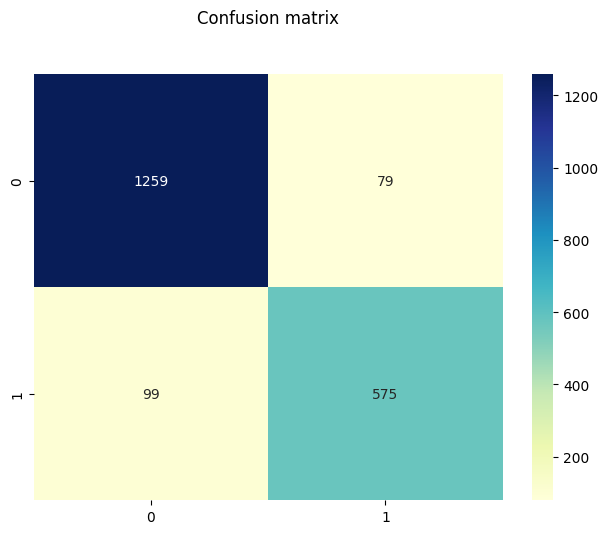

In [28]:
# Create a confusion matrix

cm = confusion_matrix(y_test, predictions)

salary_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(salary_names))
plt.xticks(tick_marks, salary_names)
plt.yticks(tick_marks, salary_names)

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)

The confusion matrix above shows the how well this model did at correctly choosing salarys below 150,000 - labeled 0, and those above it - labeled 1. It confirms that the model did better with incomes less than 150,000. 

In [29]:
# Create an index of the names of the independent columns

feature_names = X.columns
feature_names

Index(['Age', 'Gender_ID', 'Education_Level', 'Experience', 'Country', 'Race'], dtype='object')

In [30]:
# Show which features have the most influence on the outcome

feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
Experience,0.740381
Age,0.127430
Education_Level,0.085252
Gender_ID,0.046937
Country,0.000000
Race,0.000000


Based on the above information, out of the six features currently being used, Country and Race will have no income on the outcome of this decision tree. If I were to run this a second time I would exclude them and see if the model gave a better outcome.

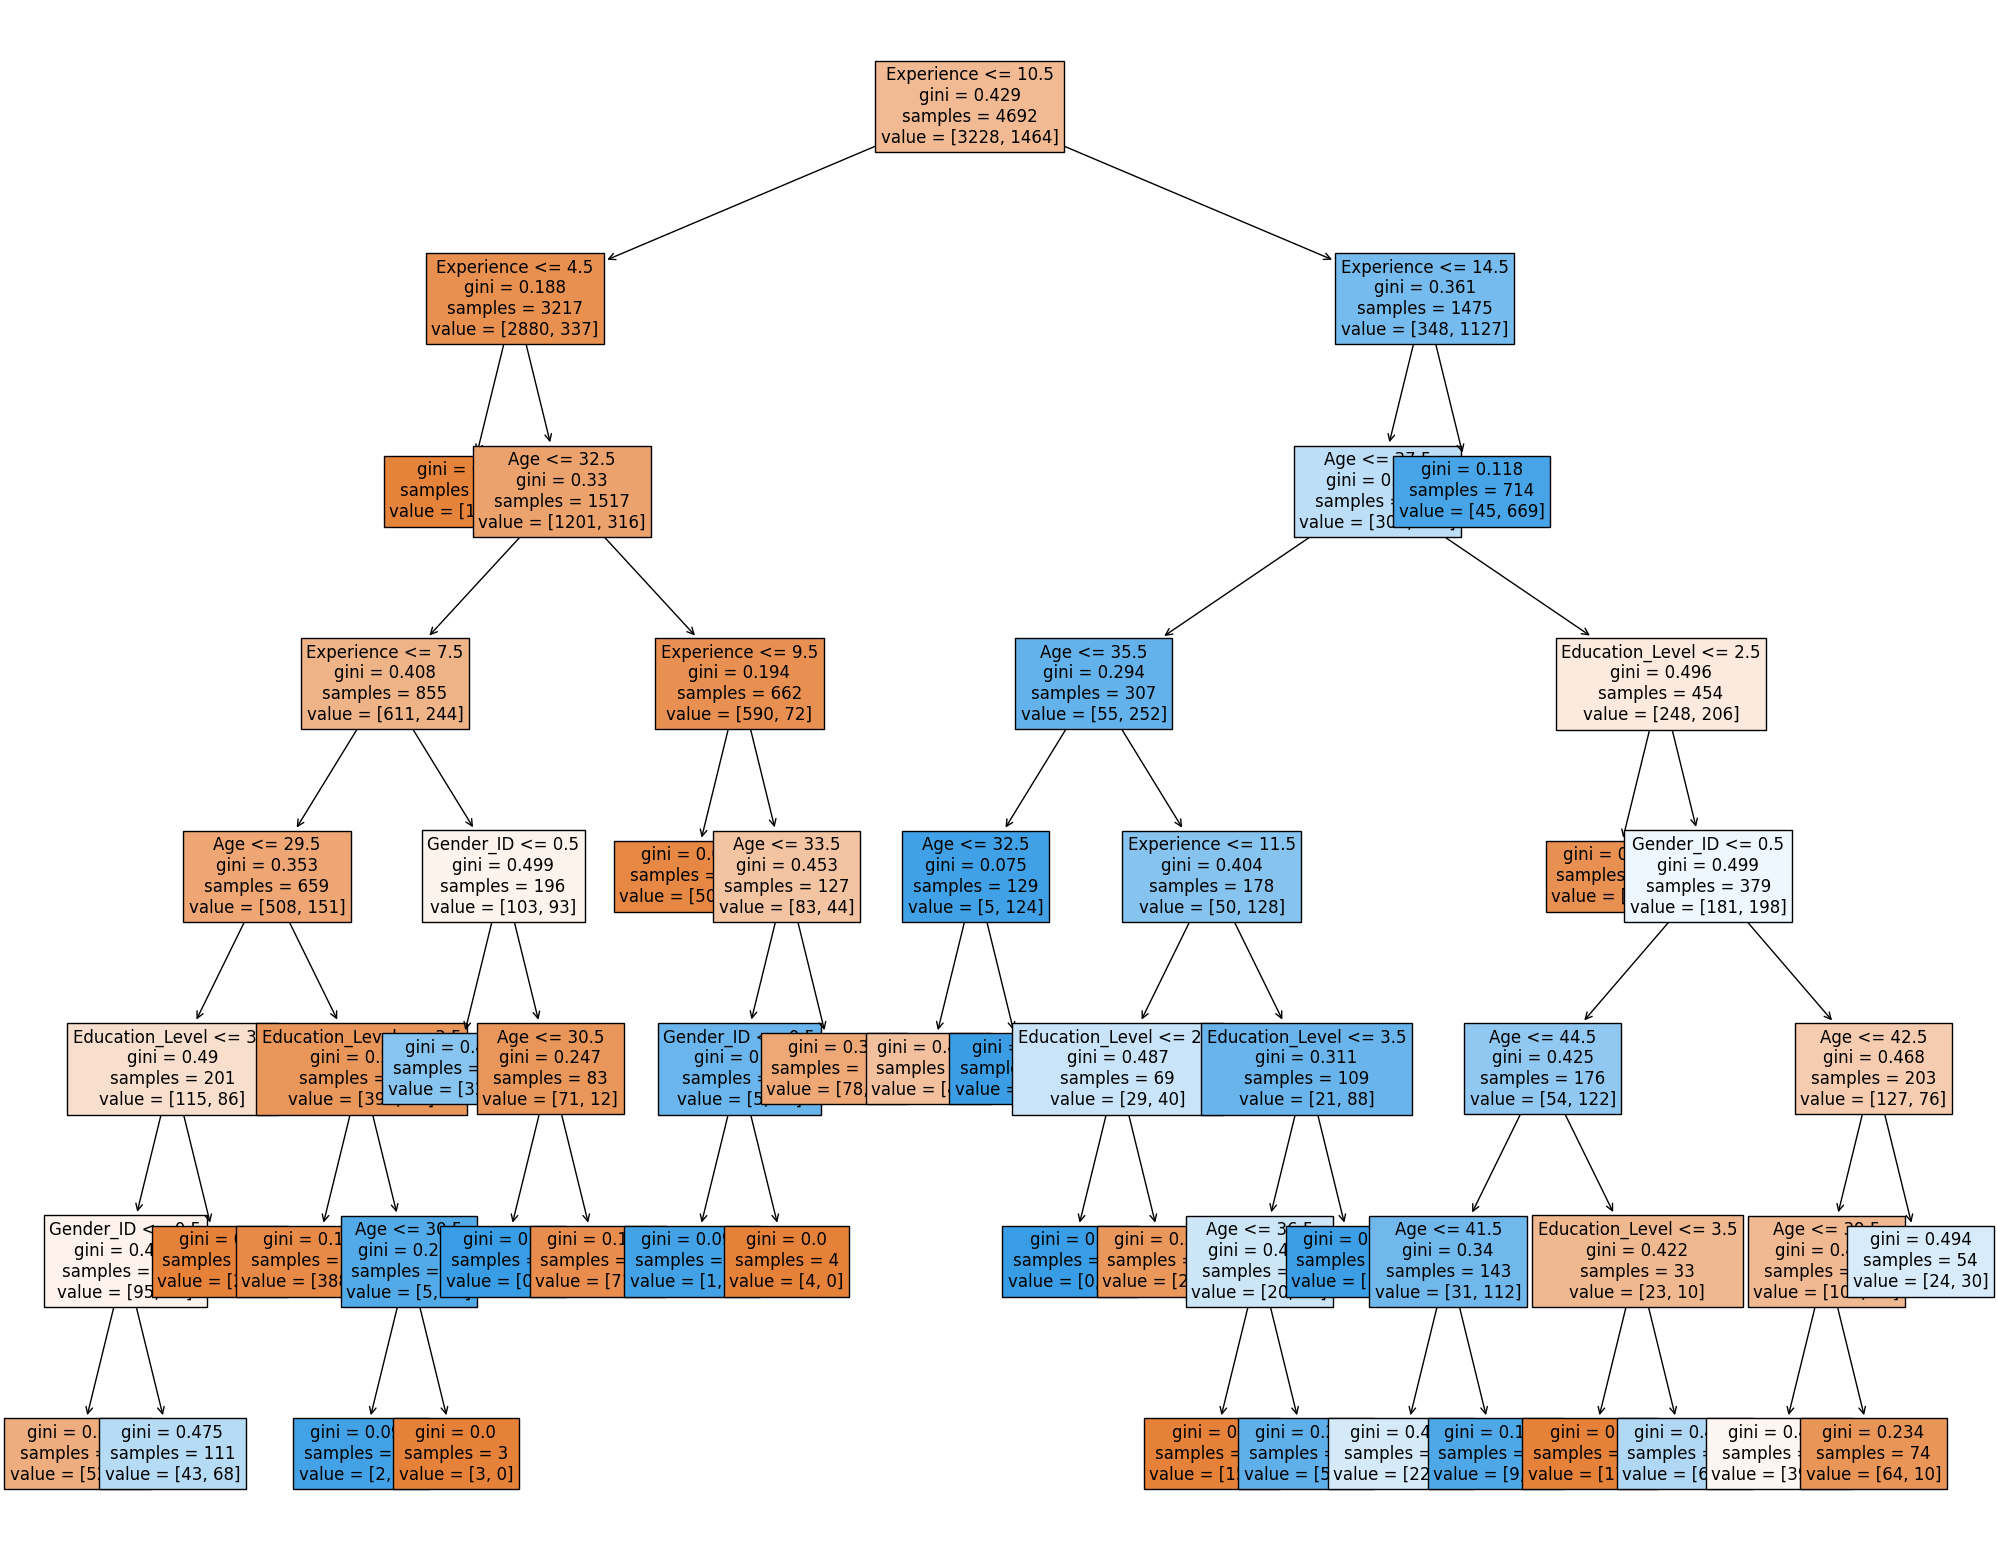

In [31]:
# Decision Tree

fig = plt.figure(figsize=(25,20))
tree = tree.plot_tree(clf, feature_names=feature_names, filled=True, fontsize=12)

The decision tree starts with Experience, the feature that has the greatest impact. From there it divides down along Age, Gender, and Education Level. Country and Race are not in here at all which correlates with their level of importance according to feature importance. If we refer back to the heatmap based on numerical data I created in the very beginning, Experience had a higher correlation with Salary then Age did. 

I tried to find a way to trim this down but in doing so I would have to sacrifice the quality and I didn't want to do that. 

# Logistic Regression

In [32]:
# Working with df1 again

df1.head()

,Age,Gender_ID,Education_Level,Experience,S_over_150k,Country,Race
0,32.0,0,2,5.0,0.0,4,1
1,28.0,1,3,3.0,0.0,5,2
2,45.0,0,4,15.0,1.0,3,1
3,36.0,1,2,7.0,0.0,5,2
4,52.0,0,3,20.0,1.0,5,3


In [33]:
# Determine our independent values X and our dependent value y

X = df1.drop('S_over_150k', axis=1)
y = df1.S_over_150k

In [34]:
# Test size will be 20%

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 101)

In [35]:
# Scale the input data

scaler = StandardScaler() 
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [36]:
# Train and Fit the Logistic Regression Model

LR = LogisticRegression(random_state=17)
LR.fit(X_train, y_train)

LogisticRegression(random_state=17)

In [37]:
y_pred = LR.predict(X_test)

In [38]:
# Take a look at the results of the model

result = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred})
result

,Actual,Predicted
5276,0.0,0.0
3328,1.0,1.0
429,1.0,0.0
5660,1.0,1.0
5151,0.0,0.0
...,...,...
476,1.0,0.0
4963,1.0,0.0
4488,0.0,0.0
4379,0.0,1.0


In [39]:
# Find the importance of each Feature

importance = LR.coef_[0]

for i,j in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,j))

for k in enumerate(X.columns):
    print(k)
    

print('')
print(f'Intercept: {LR.intercept_}')

Feature: 0, Score: -1.43046
Feature: 1, Score: -0.21188
Feature: 2, Score: 0.45960
Feature: 3, Score: 3.60860
Feature: 4, Score: -0.03319
Feature: 5, Score: -0.02033
(0, 'Age')
(1, 'Gender_ID')
(2, 'Education_Level')
(3, 'Experience')
(4, 'Country')
(5, 'Race')

Intercept: [-1.3507916]


Again we have Country and Race with a level of importance very close to zero. Experience has the highest level of importance, followed by Age, and then Education Level. I mention Age because we use the absolute values of their score. 

Text(0.5, 1, 'Confusion matrix')

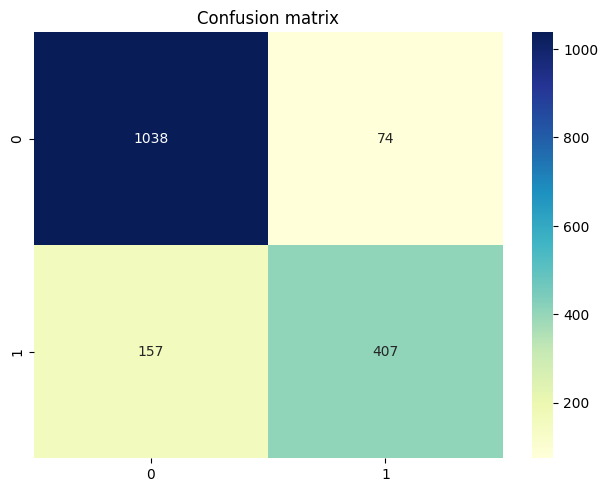

In [40]:
# Create a confusion matrix to see how well the model did at picking which salaries 
# were 0 - below $150k or 1 - above $150k

cm1 = confusion_matrix(y_test, y_pred)

salary_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(salary_names))
plt.xticks(tick_marks, salary_names)
plt.yticks(tick_marks, salary_names)

sns.heatmap(pd.DataFrame(cm1), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1)

In [41]:
print(classification_report(y_test, y_pred, target_names=['salary < $150k','salary >= $150k']))

                 precision    recall  f1-score   support

 salary < $150k       0.87      0.93      0.90      1112
salary >= $150k       0.85      0.72      0.78       564

       accuracy                           0.86      1676
      macro avg       0.86      0.83      0.84      1676
   weighted avg       0.86      0.86      0.86      1676



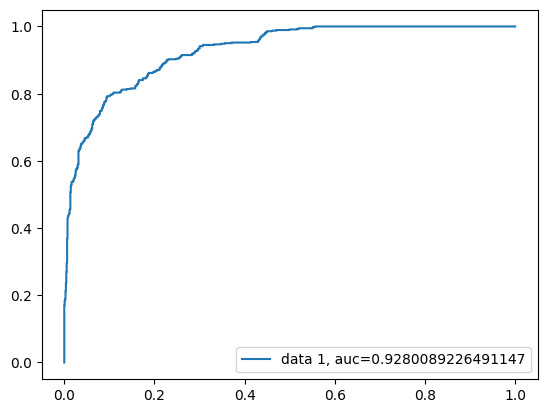

In [42]:
# Create a ROC curve and calculate the AUC score

y_pred_proba = LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

Based on the Confusion Matrix and Classification Report this model was better at predicting incomes under 150,000. The overall accuracy of 86% leaves room for improvement whereas an AUC score of 0.93 is good. 

# Linear Regression

In [43]:
# Working with df2 which includes all actual salaries

df2.head()

,Age,Gender_ID,Education_Level,Experience,Salary,Country,Race
0,32.0,0,2,5.0,90000.0,4,1
1,28.0,1,3,3.0,65000.0,5,2
2,45.0,0,4,15.0,150000.0,3,1
3,36.0,1,2,7.0,60000.0,5,2
4,52.0,0,3,20.0,200000.0,5,3


In [44]:
df2.corr()['Salary']

Age                0.727793
Gender_ID         -0.124334
Education_Level    0.642578
Experience         0.808733
Salary             1.000000
Country           -0.011559
Race              -0.006469
Name: Salary, dtype: float64

Looking at the correlation between Salary and every other feature individually we begin to get a picture of which are having a bigger impact then others. Even though we are now looking to predict an actual Salary and not a threshold we still see that Country and Race are not helpful. I find it interesting that the name of this dataset is 'Salary base on Country and Race' and there would be such a poor correlation. With this information in mind I made the decision to run the Linear Regression without either of these features. 

In [45]:
df3 = df2[['Age','Gender_ID','Education_Level','Experience','Salary']]
df3.head()

,Age,Gender_ID,Education_Level,Experience,Salary
0,32.0,0,2,5.0,90000.0
1,28.0,1,3,3.0,65000.0
2,45.0,0,4,15.0,150000.0
3,36.0,1,2,7.0,60000.0
4,52.0,0,3,20.0,200000.0


In [46]:
X=df3.drop(['Salary'],axis=1).values
y=df3['Salary'].values

In [47]:
print(X)

[[32.  0.  2.  5.]
 [28.  1.  3.  3.]
 [45.  0.  4. 15.]
 ...
 [30.  1.  2.  4.]
 [46.  0.  3. 14.]
 [26.  1.  1.  1.]]


Train-Test-Split

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=0)

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [50]:
# Use the first row to test out prediction

lr.predict([[32.0,0,2,5.0]])

array([87609.21690666])

In [51]:
print(f"Weight for Age: {lr.coef_[0]:.2f}")
print(f"Weight for Gender ID: {lr.coef_[1]:.2f}")
print(f"Weight for Experience: {lr.coef_[2]:.2f}")
print(f"Weight for Education Level: {lr.coef_[3]:.2f}")

Weight for Age: -2193.36
Weight for Gender ID: -7777.17
Weight for Experience: 15419.71
Weight for Education Level: 8223.79


In [52]:
print(f'Bias is {lr.intercept_:.2f}')

Bias is 85838.27


y-hat = -2193.36*x_(1) + -7777.17*x_(2) + 15419.71*x_(3) + 8223,79*x_(4) + 85838.27

In [53]:
y_pred_train=lr.predict(X_train)
print(y_pred_train)

[168880.28903632 180946.35432875 154940.26812132 ... 154081.61751086
 234979.64554942 125985.18599143]


In [54]:
y_pred = lr.predict(X_test)
print(y_pred)

[137567.82230721 152268.67621351  56291.55531571 ... 183139.71212176
  98026.36770796 102925.91816374]


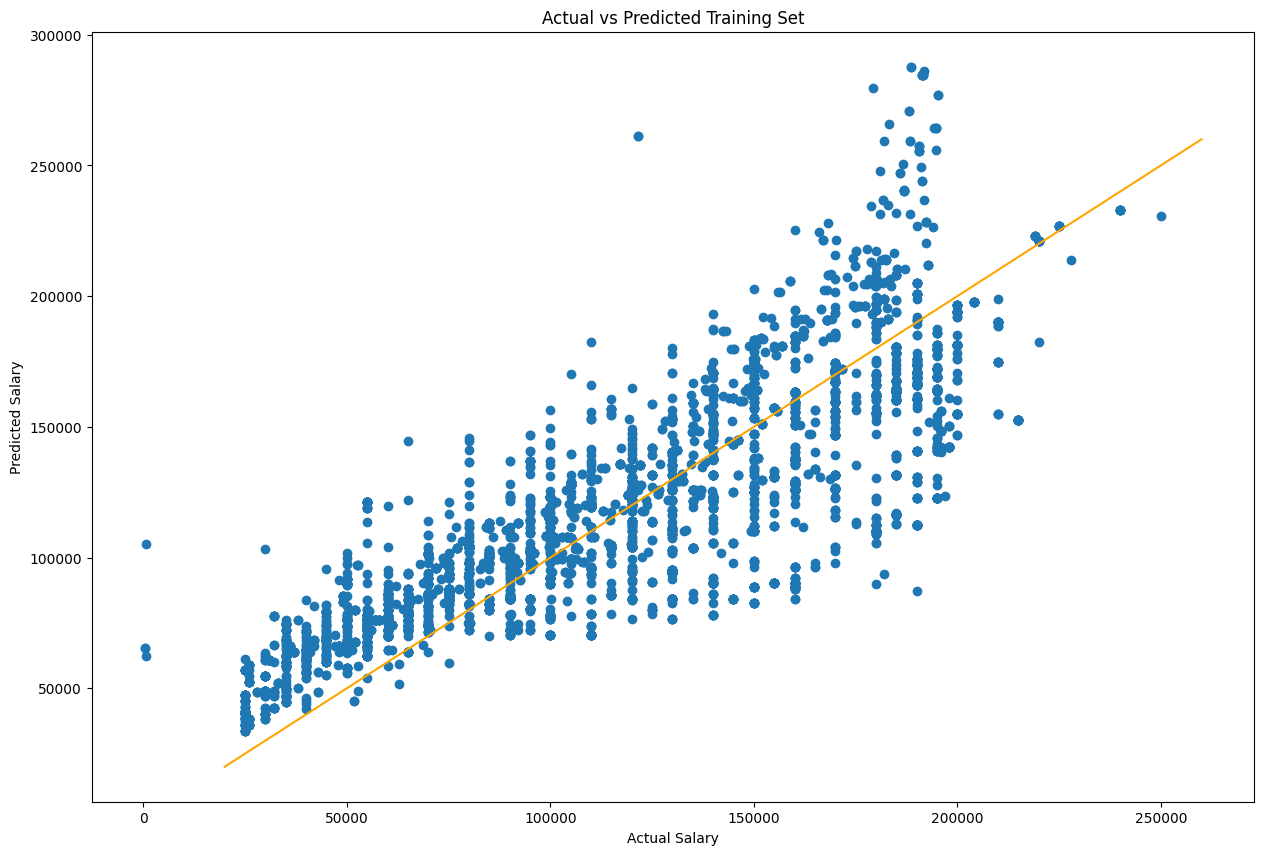

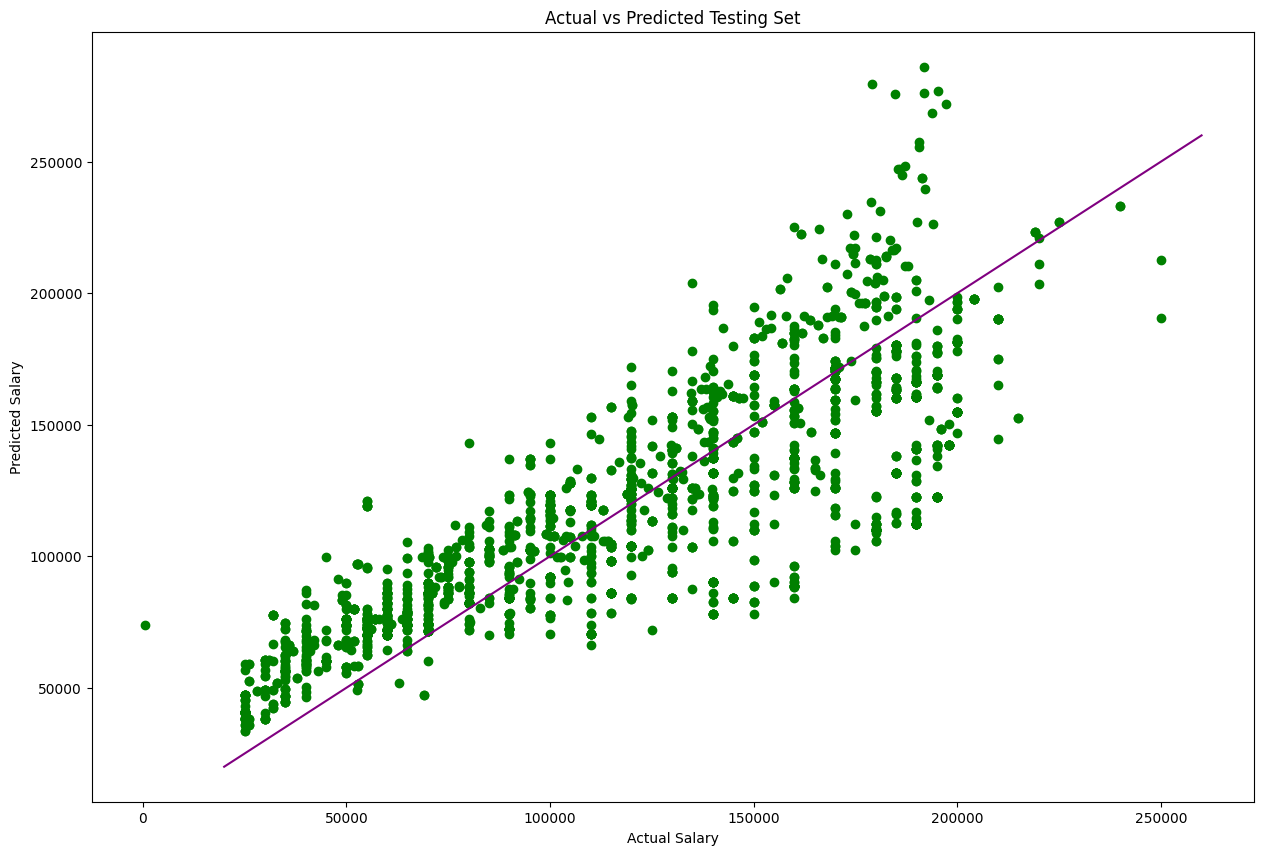

In [55]:
plt.figure(figsize=(15,10))
plt.scatter(y_train,y_pred_train)
plt.plot([20000,260000],[20000,260000], 'orange')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Training Set")
plt.show()

plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred, color='g')
plt.plot([20000,260000],[20000,260000], 'purple')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Testing Set")
plt.show()

In [56]:
#R^2 
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred)

print('R^2 for training =', r2_train)
print('R^2 for testing =', r2_test)

R^2 for training = 0.7062230748647624
R^2 for testing = 0.7098825639787942


This model did okay. I would have liked the r^2 score to be higher than 0.71 and for this plot to be tighter. As the previous data has shown, this model does better with income levels below 125,000. Once it gets above 175,000 it seems to have trouble making accurate predictions.

In [65]:
pred_y_df3=pd.DataFrame({'Actual Value': y_test, 'Predicted Value':y_pred, 'Difference': y_pred-y_test})
pred_y_df3[0:10]

,Actual Value,Predicted Value,Difference
0,120000.0,137567.822307,17567.822307
1,140010.0,152268.676214,12258.676214
2,35000.0,56291.555316,21291.555316
3,52000.0,79935.062062,27935.062062
4,90000.0,123210.581603,33210.581603
5,180000.0,110055.629706,-69944.370294
6,60000.0,72157.894736,12157.894736
7,61000.0,74351.252529,13351.252529
8,100000.0,119444.908229,19444.908229
9,200000.0,198488.021811,-1511.978189


Looking at the actual salary, predicted salary and the difference I noticed that the Predicted Salaries are higher than the Actual. 

# Gradient Descent

In [58]:
features = ['Age','Gender_ID','Experience','Education_Level']
target = 'Salary'

In [59]:
def sigmoid(w_sum):
    return 1/(1+np.exp(-w_sum))

In [60]:
def predict(features, weights, bias):
    return sigmoid(np.dot(features, weights) + bias)

In [61]:
def cross_entropy(target, pred):
    return -(target*np.log10(pred)+(1-target)*(np.log10(1-pred)))

In [62]:
def gradient_descent(x, y, weights, bias, learnrate, pred):
    new_weights = []
    bias += learnrate*(y-pred)
    
    for w,xi in zip(weights,x):
        new_weight = w + learnrate*(y-pred)*xi
        new_weights.append(new_weight) 
    return new_weights, bias

In [63]:
epochs = 10
learnrate = 0.1
    
errors = []
weights = np.array([-2193.36,-7777.17,15419.71,8223.79])
bias = 85838.27

In [64]:
new_weights = []

for e in range(epochs):
    for x, y in zip(features, target):
        pred = predict(features, weights, bias)
        error = cross_entropy(y, pred)
        weights, bias = gradient_descent(x, y, weights, bias, learnrate, pred)
    
    # Printing out the log-loss error on the training set
    out = predict(features, weights, bias)
    loss = np.mean(cross_entropy(y, out))
    errors.append(loss)
    print("\n========== Epoch", e,"==========")
    print("Average loss: ", loss)

ValueError: data type must provide an itemsize

In summary, the Exploratory Data Analysis of this dataset gave us accurate predictions of what the models would show. I chose to focus on Salary for this project but I could see using this to focus on Gender, Country or Race. Years of Experience proved to be the most important Feature across all three models. Age was second, but it had a negative effect. I hypothesized this to be due to the high number of people under 30. I chose to use a total of four independent features but I am curious to see how they would due broken down into smaller groups, or even in a one to one. I saw similar outcomes in both Regression models. As Salaries increased, the quality of the model decreased. 

I chose to attempt to use Gradient Descent with no success. While I have a good understanding of it from a classroom setting I have no experience using it in Python and spent a good amount of time online trying to learn how to apply it here. I left my work in so you could see that I did try. 